In [1]:
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import LineString
from shapely.geometry import LinearRing

import itertools

import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
def point_dis(p1,p2):
    
    dx = p2.x-p1.x
    dy = p2.y-p1.y
    
    return np.sqrt(dx*dx+dy*dy)

In [3]:
def plot_ring(lr):
    
    X = []
    Y = []
    
    for p in list(lr.coords):
        X.append(p[0])
        Y.append(p[1])
        
    plt.plot(X,Y)

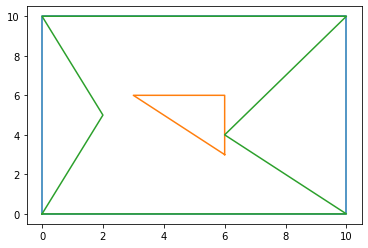

In [4]:
lr1 = LinearRing(
    [
        (0,0),
        (0, 10),
        (10,10),
        (10,0)
    ]
)

lr2 = LinearRing(
    [
        (6,3),
        (3,6),
        (6,6),
    ]
)

lr3 = LinearRing(
    [
        (0,0),
        (2,5),
        (0, 10),
        (10,10),
        (6,4),
        (10,0)
    ]
)

plot_ring(lr1)
plot_ring(lr2)
plot_ring(lr3)

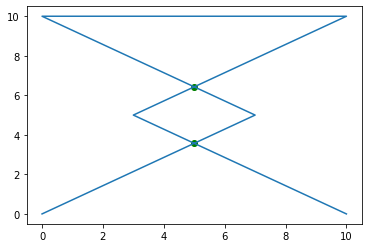

In [24]:
lr4 = LineString(
    [
        (0,0),
        (7,5),
        (0, 10),
        (10,10),
        (3,5),
        (10,0)
    ]
)

plot_ring(lr4)
self_intersections(lr4)

In [23]:
def self_intersections(ls):
    
    
    intersection_points = []
    
    for i in range(len(ls.coords)-3):
        
        p0 = ls.coords[i]
        p1 = ls.coords[i+1]
    
        remaining_path = LineString(ls.coords[i+2:])
        test = LineString([p0,p1])
        
        
        
        # check for intersection only with the linestring coords 2 past the start (the next line cannot intersect with the current line)
        if test.intersects(remaining_path):
            
            # calculate intersection(s)
            intersections = test.intersection(remaining_path)
            
            if intersections.type == "Point":
                plt.scatter(intersections.x,intersections.y,c='green')
                intersection_points.append(intersections)
            else:
                for p in intersections:
                    plt.scatter(p.x,p.y,c='blue')
                    intersection_points.append(p)

    return intersection_points
            
        

In [22]:
# evenly sample the linestring
def sample(ls, distance):
    
    pos = 0
    
    points = []
    
    while pos < ls.length:
        points.append(ls.interpolate(pos))
        
        pos += distance
        
    return points   
        
        
# get the curvature between 3 points
def curvature(p0,p1,p2):
    
    # side lengths
    A = p0.distance(p1)
    B = p0.distance(p2)
    C = p1.distance(p2)
    
    
    # calculate the angle at p1
    a10 = np.arctan2((p0.y-p1.y), (p0.x-p1.x))
    a12 = np.arctan2((p2.y-p1.y), (p2.x-p1.x))
    
    alpha = a12-a10
    
    # area of triange
    area = 0.5 * A*C*np.sin(alpha)
    
    return A*B*C/(4*area)
    
# get the next vertex index in the linestring from a given point "p"
def get_next_index(ls, p):
    
    dis = ls.project(p)
    
    coords = [Point(p) for p in ls.coords]
    
    for i,p in enumerate(coords):
        if ls.project(p) > dis:
            return i
            
    return len(coords)-1

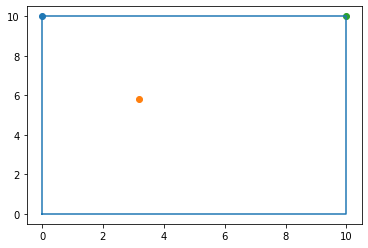

In [25]:
result = sample(lr2, 4)




ni = get_next_index(lr1, result[1])

p0 = Point(lr1.coords[ni])
p2 = Point(lr1.coords[ni+1])
p1 = result[1]

plot_ring(lr1)

for p in [p0,p1,p2]:
    plt.scatter(p.x,p.y)

POINT (0 0) 5.080354318352214
POINT (2 5) -7.250000000000001
POINT (0 10) 5.080354318352215
POINT (10 10) 5.099019513592781
POINT (6 4) -5.0990195135927845
POINT (10 0) 5.099019513592785


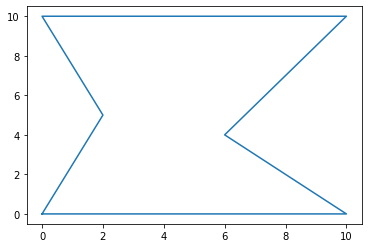

In [36]:

points = lr3.coords[:-1]

curvatures = []

for i in range(0, len(points)):
        
    p0 = Point(points[i-1])
    p1 = Point(points[i])
    p2 = Point(points[i+1 if i+1 < len(points) else 0])
    
    curvatures.append(curvature(p0,p1,p2))
    
    print(p1,curvatures[i])
        
plot_ring(lr3)

In [21]:
p0 = Point((0,0))
p1 = Point((1,1))
p0.angle(p1)

AttributeError: 'Point' object has no attribute 'angle'

LINESTRING (6 3, 3 6, 6 6, 6 3)


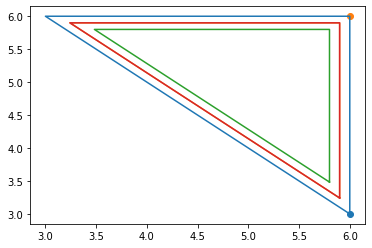

In [34]:
ls = LineString(list(lr2.coords)[0:])
print(ls)

plot_ring(lr2)
plot_ring(ls.buffer(0.1, join_style = 2, cap_style=2).interiors[0])
plot_ring(ls.buffer(0.2, join_style = 2, cap_style=2).interiors[0])

plt.scatter(lr2.coords[0][0],lr2.coords[0][1])
plt.scatter(lr2.coords[2][0],lr2.coords[2][1])

plot_ring(lr2.buffer(0.1).interiors[0])

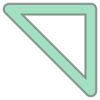

In [23]:
lr2.buffer(0.2)

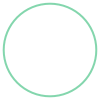

In [15]:
Point(0,0).buffer(1).exterior

In [5]:
x = LineString([(1,1),(4,5)])

In [22]:
def extend_linestring(line, dis=10):
    
    p1 = line.coords[0]
    p2 = line.coords[1]

    dx = p2[0]-p1[0]
    dy = p2[1]-p1[1]
    
    angle = np.arctan2(dy,dx)
    
    px = np.cos(angle)*dis + p2[0]
    py = np.sin(angle)*dis + p2[1]
    
    return LineString((line.coords[0], (px,py)))

POINT (7.75 10)


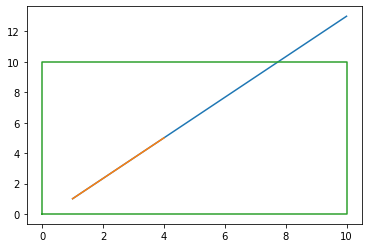

In [23]:
print(extend_linestring(x).intersection(lr1))

plot_ring(extend_linestring(x))
plot_ring(x)
pblot_ring(lr1)

In [29]:
print(Polygon(lr1).exterior)

LINEARRING (0 0, 0 10, 10 10, 10 0, 0 0)


In [4]:
def reverse(lr):
    
    return LinearRing(list(lr.coords)[::-1])
    
    
a    

26.3173315765213


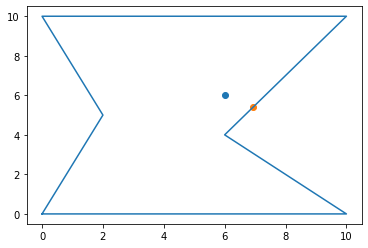

In [6]:
test_pt = Point(6,6)

dis = lr3.project(test_pt)


print(dis)

point = lr3.interpolate(dis)

plt.scatter(test_pt.x, test_pt.y)
plt.scatter(point.x, point.y)
plot_ring(lr3)

5.9422508216656595
1.2998673672393628
1.4142135623730951


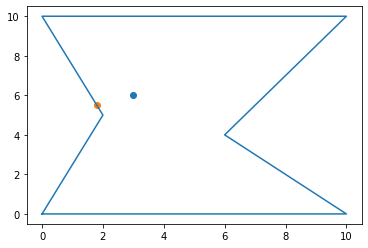

In [7]:
test_pt = Point(3,6)

dis = lr3.project(test_pt)


print(dis)

point = lr3.interpolate(dis)

plt.scatter(test_pt.x, test_pt.y)
plt.scatter(point.x, point.y)
plot_ring(lr3)


print(point.distance(test_pt))

print(test_pt.distance(Point(2,5)))

2.0
1.0


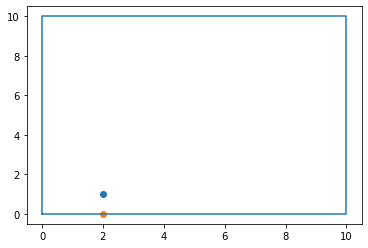

In [8]:
test_pt = Point(2,1)

rr1 = reverse(lr1)

dis = rr1.project(test_pt)


print(dis)

point = rr1.interpolate(dis)

plt.scatter(test_pt.x, test_pt.y)
plt.scatter(point.x, point.y)
plot_ring(rr1)

print(point_dis(test_pt, point))

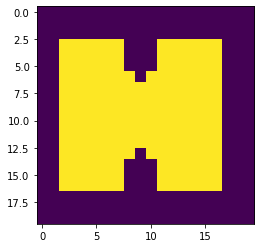

In [9]:
image = cv2.imread('area_test.png',0)
plt.imshow(image)

image = image[::1,:]


filename = "Area_test.gcode"

line_dis = 5 # mm

In [10]:
# return a list of lists of lines
def generate_border_lines(image):

    contours,heirarchy = cv2.findContours(image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)  

    contour_list = []

    for contour,heirarchy in zip(contours, heirarchy[0]):
        point_list = []
        pt0 = None
        for point in contour:
            point_list.append(tuple(point[0]))
            
        contour_list.append((point_list, heirarchy))

    return contour_list

In [11]:
# get all of the children of the parent contour
def get_children(contour_list, parent_contour):

    child_list = []

    first_child_index = parent_contour[1][2]
    child = contour_list[first_child_index]
    child_list.append(child[0])


    # loop while there are more children
    while not child[1][0] == -1:
        next_child_index = child[1][0]
        child = contour_list[next_child_index]
        child_list.append(child[0])
    
    # return the list of children
    return child_list

In [12]:
# combine contours into single level parent-children relationships
def create_contour_families(contour_list):

    family_list = []

    # find the first parent contour
    for contour in contour_list:
        
        # start with a parent contour
        if contour[1][3]==-1:

            # if there are no children, create an empty family with only the parent contour
            if contour[1][2] == -1:
                child_list = []
            # otherwise, find all of the children
            else:
                child_list = get_children(contour_list, contour)

            if len(contour[0]) > 2:
                family_list.append(Polygon(contour[0], holes=child_list))

    return family_list

In [13]:
def distance_transform(polygon, distance):
        
    t = polygon.buffer(distance)
    
    # if t is empty, return the empty list
    if not t:
        return []
        
    result = []

    if t.type == "MultiPolygon":
        for p in t:
            result.append([p])
            result[-1].extend(distance_transform(p, distance))
    else:
        result.append(t)
        result.extend(distance_transform(t, distance))
        
        
    return result

In [18]:

polygon = generate_border_lines(image)
print(polygon[0])

result = distance_transform(polygon[0],0.3)




([(2, 3), (2, 16), (7, 16), (7, 14), (9, 12), (11, 14), (11, 16), (16, 16), (16, 3), (11, 3), (11, 5), (9, 7), (7, 5), (7, 3)], array([-1, -1, -1, -1], dtype=int32))


AttributeError: 'tuple' object has no attribute 'buffer'